In [80]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


            WAG_C_M
month              
1993-01-01     15.3
1993-02-01     19.1
1993-03-01     23.6
1993-04-01     30.6
1993-05-01     37.5
...             ...
2016-04-01  36497.0
2016-05-01  37270.0
2016-06-01  38447.0
2016-07-01  35888.0
2016-08-01  34095.0

[284 rows x 1 columns]


<AxesSubplot:xlabel='month'>

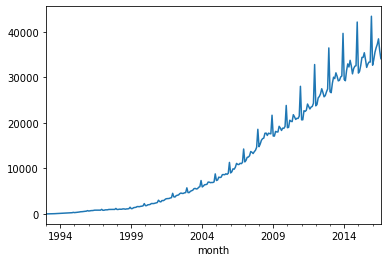

In [81]:
df = pd.read_csv('WAG_C_M.csv', sep=';', index_col=['month'], parse_dates=['month'], dayfirst=True)
print(df)
df.WAG_C_M.plot()

### Стабилизация дисперсии
Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Зарплата')

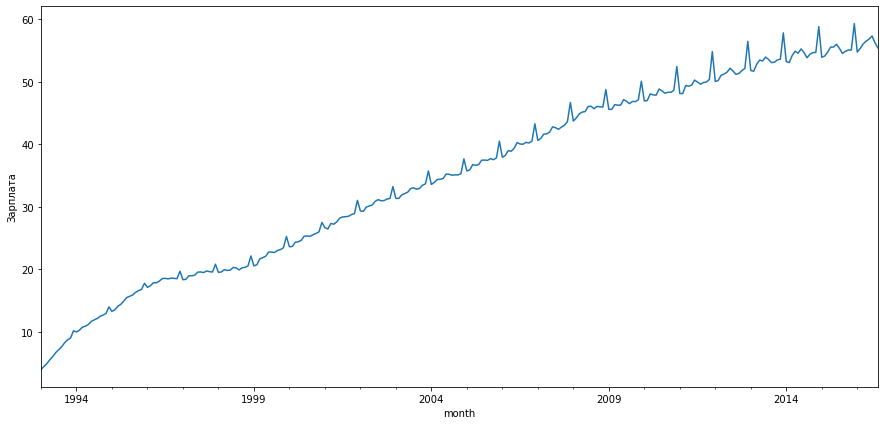

In [82]:
df['WAG_C_M_box'], lmbda = stats.boxcox(df.WAG_C_M)
plt.figure(figsize(15,7))
df.WAG_C_M_box.plot()
plt.ylabel(u'Зарплата')

In [88]:
model=sm.tsa.statespace.SARIMAX(df.WAG_C_M_box, order=(2, 1, 2), 
                                        seasonal_order=(0, 1, 0, 12),
                                       initialization='approximate_diffuse').fit(disp=-1)

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


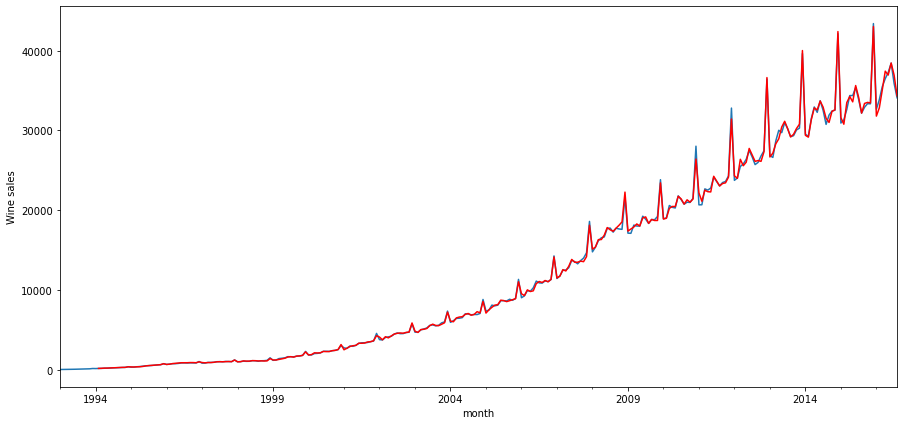

In [86]:
df['model'] = invboxcox(model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
df.WAG_C_M.plot()
df.model[13:].plot(color='r')
plt.ylabel('Wine sales')
pylab.show()

### Прогноз

In [77]:
df

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,WAG_C_M,WAG_C_M_box,model
month,,,
1993-01-01,15.3,3.990393,1.000000
1993-02-01,19.1,4.458758,27.937529
1993-03-01,23.6,4.931635,23.841836
1993-04-01,30.6,5.549430,26.507540
1993-05-01,37.5,6.063406,33.542137
...,...,...,...
2016-04-01,36497.0,56.526742,37439.504790
2016-05-01,37270.0,56.860441,36950.647102
2016-06-01,38447.0,57.358885,38461.320872


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


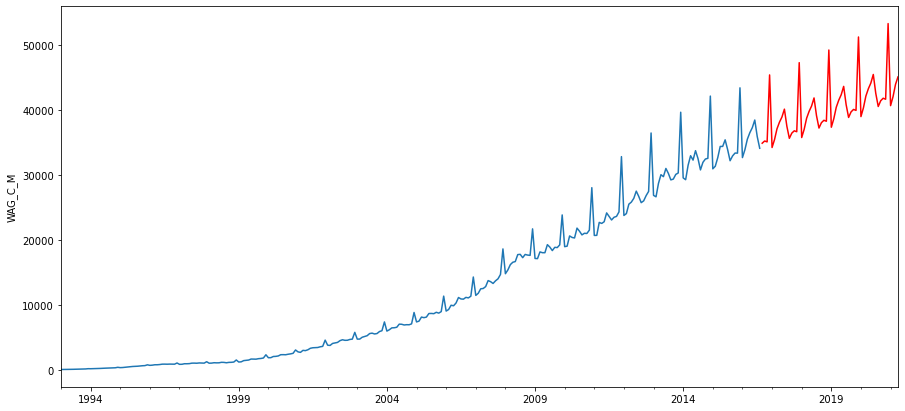

In [90]:
df2 = df[['WAG_C_M']]
date_list = [datetime.datetime.strptime("2016-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,56)]
future = pd.DataFrame(index=date_list, columns= df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = invboxcox(model.predict(start=284, end=341), lmbda)

plt.figure(figsize(15,7))
df2.WAG_C_M.plot()
df2.forecast.plot(color='r')
plt.ylabel('WAG_C_M')
pylab.show()